Yanxin Luo

Q1 (a)

$a_1=\beta_0,b_1=\beta_1,c_1=\beta_2,d_1=\beta_3$

Q1 (b)

$a_2=\beta_0-\beta_4\xi^3, b_2=\beta_1+3\beta_4\xi^2,c_2=\beta_2-3\beta_4\xi,d_2=\beta_3+\beta_4$

Q1 (c)

$\lim\limits_{x \to \xi^{-1}}f_1(x)=\lim\limits_{x \to \xi^{-1}}f(x)=\lim\limits_{x \to \xi^{+1}}f(x)=\lim\limits_{x \to \xi^{+1}}f_2(x)$

Thus, $f(x)$ is continous at $\xi$.


Q1 (d)

$\lim\limits_{x \to \xi^{-1}}f_1'(x)=\lim\limits_{x \to \xi^{-1}}f'(x)=\lim\limits_{x \to \xi^{+1}}f'(x)=\lim\limits_{x \to \xi^{+1}}f_2'(x)=\beta_1+2\beta_2\xi+3\beta_3\xi^2$

Thus, $f'(x)$ is continous at $\xi$.

Q1 (e)

$\lim\limits_{x \to \xi^{-1}}f_1''(x)=\lim\limits_{x \to \xi^{-1}}f''(x)=\lim\limits_{x \to \xi^{+1}}f''(x)=\lim\limits_{x \to \xi^{+1}}f_2''(x)=2\beta_2+6\beta_3\xi$

Thus, $f''(x)$ is continous at $\xi$.

Q2 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline 

np.random.seed(42)
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(scale=0.2, size=len(x))

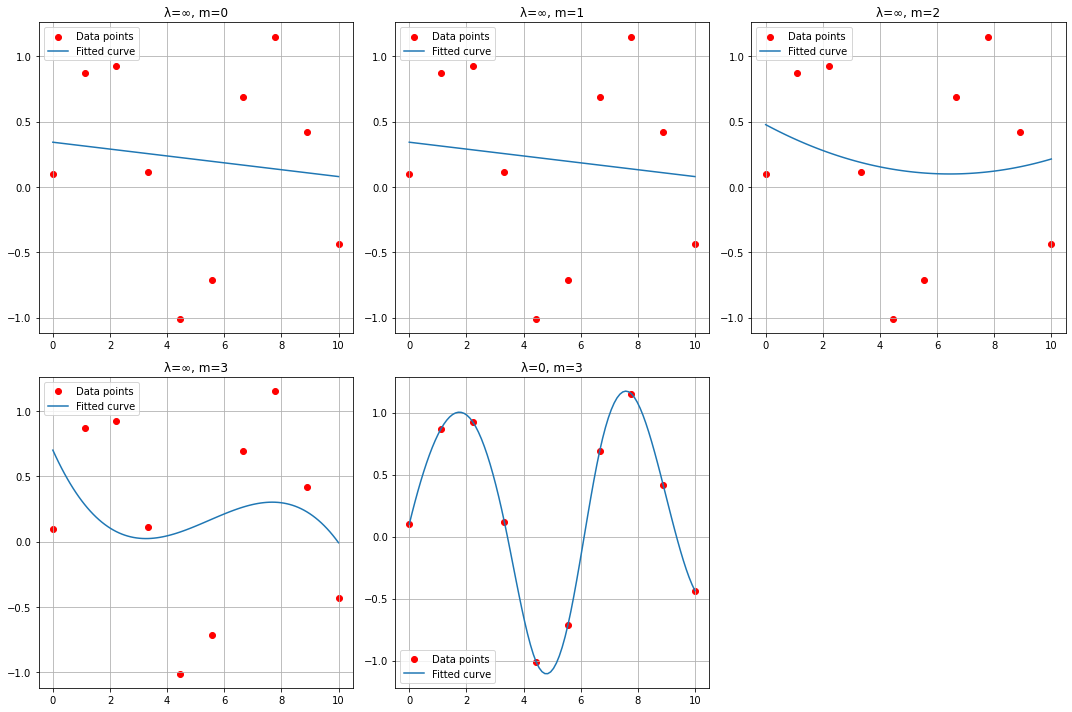

In [8]:
scenarios = [
    ("λ=∞, m=0", 1, 1000),  # Closest alternative: very high λ with k=1 (step-like)
    ("λ=∞, m=1", 1, 1000),  # Piecewise linear (high λ)
    ("λ=∞, m=2", 2, 1000),  # Piecewise quadratic (high λ)
    ("λ=∞, m=3", 3, 1000),  # Piecewise cubic (high λ)
    ("λ=0, m=3", 3, 0),     # Interpolating cubic spline (no smoothing)
]

fig, axes = plt.subplots(2,3,figsize=(15, 10))
axes = axes.ravel()

for i, (title, m, s) in enumerate(scenarios):
    spline = UnivariateSpline(x,y,k=m, s=s) 
    x_smooth = np.linspace(0, 10, 100)
    y_smooth = spline(x_smooth)

    axes[i].scatter(x, y, color='red', label="Data points")  # Data points
    axes[i].plot(x_smooth, y_smooth, label="Fitted curve")
    axes[i].set_title(title)
    axes[i].legend()
    axes[i].grid()

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Q3 

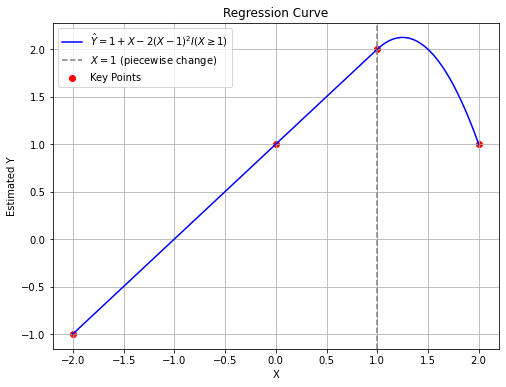

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def b1(X):
    return X

def b2(X):
    return (X-1)**2*(X>=1) 

beta_0=1
beta_1=1
beta_2=-2

def Y_hat(X):
    return beta_0+beta_1*b1(X)+beta_2*b2(X)

X_values = np.linspace(-2,2, 100)
Y_values =Y_hat(X_values)


plt.figure(figsize=(8,6))
plt.plot(X_values, Y_values, label=r'$\hat{Y} = 1 + X - 2(X-1)^2 I(X \geq 1)$', color='blue')

plt.axvline(x=1, linestyle='--', color='gray', label=r'$X=1$ (piecewise change)')
plt.scatter([-2, 0, 1, 2], [Y_hat(-2),Y_hat(0),Y_hat(1),Y_hat(2)], color='red', label="Key Points")

plt.xlabel("X")
plt.ylabel("Estimated Y")
plt.title("Regression Curve")
plt.legend()
plt.grid()
plt.show()

Q4 

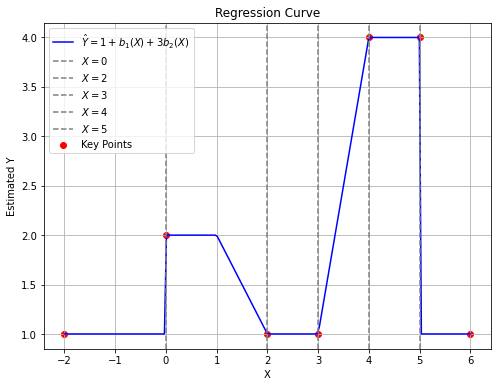

In [12]:
def b1(X):
    X = np.array(X, dtype=float)  # Ensure X is an array for correct operations
    return ((0 <= X)&(X <= 2)).astype(int)-((X-1)*((1 <= X)&(X <= 2)))

def b2(X):
    X = np.array(X,dtype=float)  
    return (X - 3)*((3 <= X)&(X <= 4))+ ((4<X)&(X <= 5)).astype(int)

# Given coefficient estimates
beta_0 = 1
beta_1 = 1
beta_2 = 3

# Define the regression function
def Y_hat(X):
    X = np.array(X, dtype=float) 
    return beta_0 + beta_1 * b1(X) + beta_2 * b2(X)

X_values = np.linspace(-2, 6, 200)
Y_values = Y_hat(X_values)


plt.figure(figsize=(8, 6))
plt.plot(X_values, Y_values, label=r'$\hat{Y} = 1 + b_1(X) + 3b_2(X)$', color='blue')

plt.axvline(x=0, linestyle='--', color='gray', label=r'$X=0$')
plt.axvline(x=2, linestyle='--', color='gray', label=r'$X=2$')
plt.axvline(x=3, linestyle='--', color='gray', label=r'$X=3$')
plt.axvline(x=4, linestyle='--', color='gray', label=r'$X=4$')
plt.axvline(x=5, linestyle='--', color='gray', label=r'$X=5$')


key_X = np.array([-2,0,2,3,4,5,6])
key_Y = Y_hat(key_X)
plt.scatter(key_X, key_Y, color='red', label="Key Points")

plt.xlabel("X")
plt.ylabel("Estimated Y")
plt.title("Regression Curve")
plt.legend()
plt.grid()
plt.show()

Q5 

c

Q6 

c

Q7 (a)

In [2]:
import pandas as pd
boston=pd.read_csv("./dataset/boston.csv")
X=boston["indus"].values.reshape(-1,1)
y=boston["nox"].values  

E:\ana\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
E:\ana\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import SplineTransformer

Mean R^2 score: 0.6512945563175373


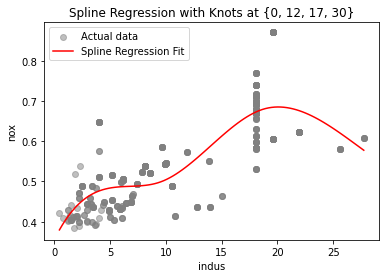

In [48]:

knots = [0, 12, 17, 30] 
spline = SplineTransformer(n_knots=len(knots), degree=3, include_bias=False)
X_spline = spline.fit_transform(X)

model = LinearRegression()
model.fit(X_spline, y)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_spline, y, cv=cv, scoring='r2')

print("Mean R^2 score:", np.mean(scores))

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_spline_range = spline.transform(X_range)
y_pred = model.predict(X_spline_range)

plt.scatter(X, y, color="gray", alpha=0.5, label="Actual data")
plt.plot(X_range, y_pred, color="red", label="Spline Regression Fit")
plt.xlabel("indus")
plt.ylabel("nox")
plt.legend()
plt.title("Spline Regression with Knots at {0, 12, 17, 30}")
plt.show()

Mean R^2 score: 0.7125160132585984


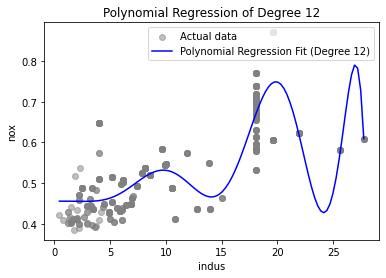

In [87]:
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=12, include_bias=False)

poly_model = make_pipeline(poly, LinearRegression())

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(poly_model, X, y, cv=cv, scoring='r2')

print("Mean R^2 score:", np.mean(scores))

poly_model.fit(X, y)


X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = poly_model.predict(X_range)


plt.scatter(X, y, color="gray", alpha=0.5, label="Actual data")
plt.plot(X_range, y_pred, color="blue", label="Polynomial Regression Fit (Degree 12)")
plt.xlabel("indus")
plt.ylabel("nox")
plt.legend()
plt.title("Polynomial Regression of Degree 12")
plt.show()


Mean R^2 score: 0.7370103378269228


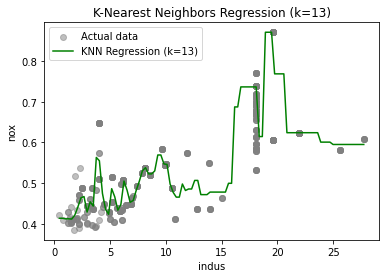

In [51]:

knn_model = KNeighborsRegressor(n_neighbors=13)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X, y, cv=cv, scoring='r2')

print("Mean R^2 score:", np.mean(scores))

knn_model.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = knn_model.predict(X_range)

plt.scatter(X, y, color="gray", alpha=0.5, label="Actual data")
plt.plot(X_range, y_pred, color="green", label="KNN Regression (k=13)")
plt.xlabel("indus")
plt.ylabel("nox")
plt.legend()
plt.title("K-Nearest Neighbors Regression (k=13)")
plt.show()

Q7 (b)

In [3]:
import pygam

In [11]:
X_new=boston[["dis","indus","rad"]].values
y_new=boston["nox"].values

100% (64 of 64) |########################| Elapsed Time: 0:00:02 Time:  0:00:020000


Optimal lambda values [[10.0], [1.0], [1.0]].


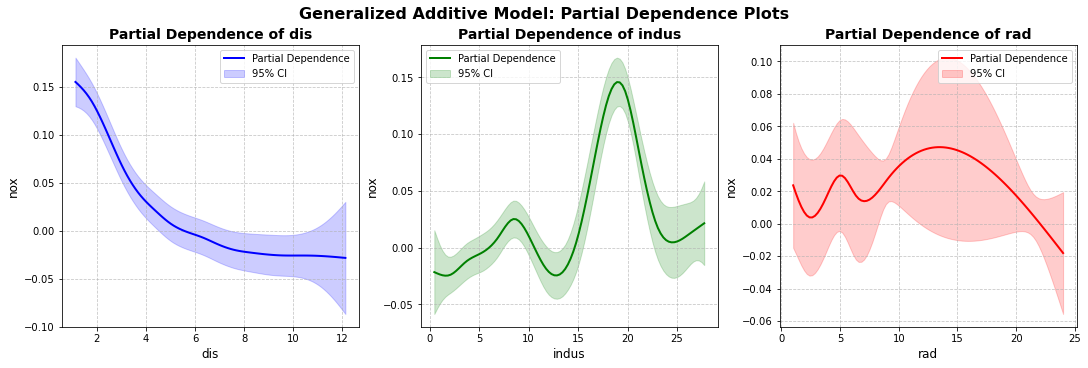

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

gam = LinearGAM(s(0) + s(1) + s(2))

lam=[0.5,1,5,10]
lam_grid=np.array(np.meshgrid(lam,lam,lam)).T.reshape(-1,3)

gam.gridsearch(X_new,y_new,lam=lam_grid)

print(f"Optimal lambda values {gam.lam}.")

fig,axs=plt.subplots(1,3,figsize=(15,5) ,constrained_layout=True)
features=["dis","indus","rad"]
colors = ["blue", "green", "red"] 

for i, label in enumerate(features):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    confi = gam.partial_dependence(term=i, X=XX, width=0.95) 

    axs[i].plot(XX[:,i], pdep, color=colors[i], linewidth=2, label="Partial Dependence")
    axs[i].fill_between(XX[:,i],confi[1][:,0] ,confi[1][:,1], color=colors[i], alpha=0.2, label="95% CI")

    axs[i].set_title(f"Partial Dependence of {label}", fontsize=14, fontweight="bold")
    axs[i].set_xlabel(label, fontsize=12)
    axs[i].set_ylabel("nox", fontsize=12)
    axs[i].legend()
    axs[i].grid(True, linestyle="--", alpha=0.7)

plt.suptitle("Generalized Additive Model: Partial Dependence Plots", fontsize=16, fontweight="bold")
plt.show()

 (iii)
 
The shaded red region (95% CI) is very wide at multiple points, particularly in the middle $15$ and at higher values $>24$. It suggests high uncertainty, meaning the model is not confident in the effect of rad.